# Table of Contents
 <p><div class="lev1"><a href="#Exercise-Sheet-1:-Neurons"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise Sheet 1: Neurons</a></div><div class="lev2"><a href="#Task-1:-The-logistic-function-(1-point---programming)"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Task 1: The logistic function (1 point - programming)</a></div><div class="lev2"><a href="#Task-2:-Building-an-artificial-neuron--(3-points---programming)"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task 2: Building an artificial neuron  (3 points - programming)</a></div><div class="lev2"><a href="#Task-3:-Use-an-artificial-neuron-(4-points---thinking-and-programming)"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Task 3: Use an artificial neuron (4 points - thinking and programming)</a></div><div class="lev2"><a href="#Task-4:-The-XOR-function-(100-extra-points---thinking-and-maybe-programming)"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Task 4: The XOR function (100 extra points - thinking and maybe programming)</a></div><div class="lev2"><a href="#Task-5:-The-current-density-(6-points---analytic-derivation)"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Task 5: The current density (6 points - analytic derivation)</a></div><div class="lev3"><a href="#Solution:"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Solution:</a></div><div class="lev2"><a href="#Task-6:-Electrical-Field-strength-&amp;-potential-of-a-dipole-(6-points---programming)"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Task 6: Electrical Field strength &amp; potential of a dipole (6 points - programming)</a></div>

# Exercise Sheet 1: Neurons

In [1]:
%matplotlib inline
import numpy as np
from scipy import constants
from matplotlib import pyplot as plt

## Task 1: The logistic function (1 point - programming)
Write a function "logistic(h,a=1)" resembling the logistic function and a second function "signtrafunc" the more discrete tranfer function equivalent in form of a function of the sign of the input.

For defining the sign-based transfer function the inline definition of functions using the syntax trafunc=lambda x: f(x) might be handy, please write the logistic function, however, as a classical function definition. The *a=1* in the function definition sets the default to *a=1* so the function needs only 1 argument by default.

In [2]:
def logistic(h,a=1):
    return 1/(1+np.exp(-a*h))

signtrafunc=lambda x: (np.sign(x) +1 ) / 2

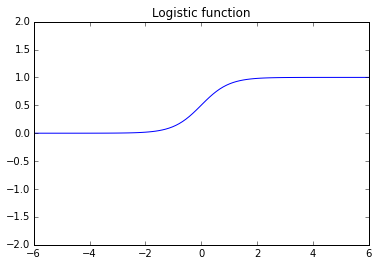

In [3]:
x=np.linspace(-6,6,100)
y=logistic(x,2)

plt.plot(x,y)
plt.ylim((-2,2))
plt.title('Logistic function')

(-2, 2)

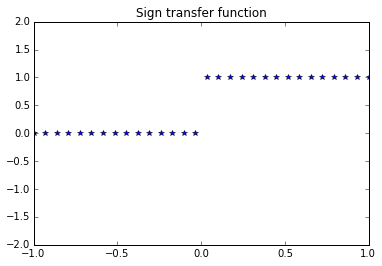

In [4]:
x=np.linspace(-1,1,30)
y=signtrafunc(x)



plt.plot(x,y, '*')
plt.title('Sign transfer function')
plt.ylim((-2,2))

## Task 2: Building an artificial neuron  (3 points - programming)
Define a class "neuron" resembling a simple perceptron. See https://docs.python.org/3/tutorial/classes.html for help on classes.

It should have the attributes "neuron.w" for the weights, "neuron.b" for the bias, the method "neuron.trafunc(self,x)" for the transfer function and the method "neuron.out(self,x)" to calculate the output for input *x*. 

Build a constructor method "\__init\__(self,...)", where self refers to the object itself, which assigns the weight vector *w*, the bias *b* and the transfer function "trafunc" to the neuron.

In [5]:
class neuron:

    def __init__(self, weights, biases, trafunc=signtrafunc):
        self.w = weights
        self.b = biases
        self.trafunc = trafunc
    
    def out(self, x):
        return self.trafunc(np.dot(self.w, x) - self.b)
            

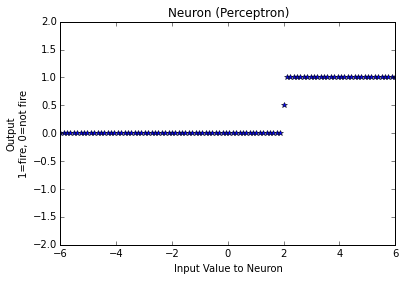

In [6]:
myNeuron = neuron(.5,1)

x = np.linspace(-6,6,100)


plt.plot(x, myNeuron.out(x), '*')
plt.ylim((-2, 2))
plt.title('Neuron (Perceptron)')
plt.xlabel('Input Value to Neuron')
plt.ylabel('Output\n1=fire, 0=not fire')

## Task 3: Use an artificial neuron (4 points - thinking and programming)
Use instances of the neuron class above to build the equivalents to logical "or" and "and"-functions and test them for 2-dimensional input vectors *x* resembling all possibilities of combinations ([0,0], [1,0], [0,1], [1,1]).

First, use the sign-based transfer function to solve the task and then apply the same weights w and bias b on a neuron with the logistic transfer function.

What's the difference?

*Hint: if you haven't succeeded with Task 2, you can solve Task 3 analytically and write down the needed weights and results.*

In [7]:
# Define neurons
OR_Neuron = neuron(np.array([1,1]),.99)
AND_Neuron = neuron(np.array([1,1]),1.01)

# Define inputs
inp = np.array(([0,0], [1,0], [0,1], [1,1]))

# Evaluate OR
for i in range(4):
    outp = OR_Neuron.out(inp[i])
    print('OR', inp[i], '-->', (outp))

    
# Some spacing    
print('\n')    


# Evaluate AND    
for i in range(4):
    outp = AND_Neuron.out(inp[i])
    print('AND', inp[i], '-->', (outp))    

OR [0 0] --> 0.0
OR [1 0] --> 1.0
OR [0 1] --> 1.0
OR [1 1] --> 1.0


AND [0 0] --> 0.0
AND [1 0] --> 0.0
AND [0 1] --> 0.0
AND [1 1] --> 1.0


In [8]:
# Do the same for a neuron with logistic transfer.
# Does not work, because the logistic function does not have
# a binary output ... logical operators always have a binary output

OR_Neuron = neuron(np.array([1,1]),.99, trafunc=logistic)
AND_Neuron = neuron(np.array([1,1]),1.1, trafunc=logistic)

# Define inputs
inp = np.array(([0,0], [1,0], [0,1], [1,1]))

# Evaluate OR
for i in range(4):
    outp = OR_Neuron.out(inp[i])
    print('OR', inp[i], '-->', (outp))

    
# Some spacing    
print('\n')    


# Evaluate AND    
for i in range(4):
    outp = AND_Neuron.out(inp[i])
    print('AND', inp[i], '-->', (outp))    


OR [0 0] --> 0.270912077651
OR [1 0] --> 0.502499979167
OR [0 1] --> 0.502499979167
OR [1 1] --> 0.733020149239


AND [0 0] --> 0.249739894405
AND [1 0] --> 0.475020812521
AND [0 1] --> 0.475020812521
AND [1 1] --> 0.710949502625


## Task 4: The XOR function (100 extra points - thinking and maybe programming)
Build an XOR function with a neuron of the class you have created.



XOR: The following outputs are required for the input pairs $(X1,X2)$:
* 0,0 --> 0
* 0,1 --> 1
* 1,0 --> 1
* 1,1 --> 0

Given an input and our neuron class ...

* ... we can set the neuron's weights $w_{X1}$ and $w_{X2}$ to influence the output.

* ... we can set the neuron's bias $b$ to influence the output.

1) The weights $w_{Xi}$ will have to be set equally, because the inputs contain (0,1) and (1,0). If we were to set $w_{Xi}$ asymmetrically, we would not get the same results for (0,1) and (1,0) ... but that is necessary for XOR.

2) Given equal weights, setting the bias to $b=1$, inputs (0,1) and (1,0) will to be 0.5. Setting $b<1$ , inputs (0,1) and (1,0) will to be 1. Setting $b>1$, inputs (0,1) and (1,0) will to be 0.

3) According to (2) and (3), having equal weights and a bias of $b<1$ will result in our inputs (0,1) and (1,0) being 1. However, with these settings, input (1,1) will also be 1, which is wrong for XOR.

4) There is no combination of weights and biases for our neuron class to solve the XOR function.


## Task 5: The current density (6 points - analytic derivation)
Analytically derive the current density $\vec{J}=-\sigma\nabla\phi$ of a dipole field at origin step-by-step from the potential equation $\phi(\vec{r})=\frac{1}{4\pi\epsilon_0}\frac{\vec{p}\cdot\vec{r}}{\left|\vec{r}\right|^3}$ in Cartesian coordinates.

To this extent you will need to build the gradient $\nabla=\left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)$!

You can take the dipolar moment $\vec{p}$ to be a constant vector $\vec{p}=\left(
\begin{array}{c}
	p_x\\
	p_y\\
	p_z
\end{array}
\right)$. The vector $\vec{r}=\left(
\begin{array}{c}
	x\\
	y\\
	z
\end{array}
\right)$ is the coordinates in cartesian coordinates and  the norm is the euclidean norm $\left|\vec{r}\right|=\sqrt{x^2+y^2+z^2}$ and $\vec{e}_r=\frac{\vec{r}}{\left|\vec{r}\right|}$

*Hint: You can hand in the solution in your format of choice: Write direclty below (Markdown takes latex within $$, jsut double-click on the cell below), Pdf from Latex or Word, scan or photo of a hand-written derivation, etc....*

### Solution:
$\vec{J}=-\sigma \nabla \phi=$

## Task 6: Electrical Field strength & potential of a dipole (6 points - programming)
Write a python function resembling the electrical field potential $\phi(\vec{r},\vec{r}_0)$ and another one for the field strength $\vec{E}$ of a dipole in infinite charge free space at point $\vec{r}_0$ in Cartesian coordinates. The function should take the position of the observed point $\vec{r}$, the position of the dipole $\vec{r}_0$ and the dipole moment $\vec{p}$ as inputs and return the scalar potential. $\vec{r}_0$ should be set to the origin by default. 

$\phi(\vec{r})=\frac{1}{4\pi\epsilon_0}\frac{\vec{p}\cdot\left(\vec{r}-\vec{r}_0\right)}{\left|\left(\vec{r}-\vec{r}_0\right)\right|^3}$

$\vec{E}=\frac{1}{4 \pi \epsilon_0 } \left(3 \frac{\left(\vec{r}-\vec{r}_0\right) \cdot \vec{p}}{\left|\left(\vec{r}-\vec{r}_0\right)\right|^5} \cdot \left(\vec{r}-\vec{r}_0\right)-\frac{\vec{p}}{|\left(\vec{r}-\vec{r}_0\right)|^3}\right)$

Make a plot of the two variables in two dimensions from -10 to 10 for both axes in the x/y-plane for a dipole at origin with dipole moment $\vec{p}=[1,0]$.
Plot the potential as decibel values using the matlpotlib function plt.contour/contourf and the field strength using the function plt.steamplot. Draw both plots into the same figure (plt.hold('on')). The arguments to the plot function call for $\vec{E}$- and $\phi$- values need to thave the shape corresponding to the XX and YY variables from np.meshgrid (see below).

*Hint: You can find $\epsilon_0$ in the scipy constants...*



In [39]:
def elecFieldPot(p, rX, rY, r_0=np.array([0,0])):
    """
    IN
    - p: dipole moment, np.array with dim 2x1
    - rX: X position of observed point
    - rY: Y position of observed point
    - r_0: position of the dipole, np.array with dim 2x1
    
    OUT
    - Scalar electrical field potential
    """
    r = np.array([rX,rY])
    part1 = 1/(4*np.pi*constants.epsilon_0)
    part2_nom = np.dot(p, (r-r_0))
    part2_denom = np.linalg.norm(r) ** 3

    return part1 * (part2_nom/part2_denom)

# TODO Domenic
def field_strength(p,rX,rY, r_0=np.array([0,0])):
    
    r = np.array([rX,rY])
    
    #build part 1
    part1 = (1/(4*np.pi*constants.epsilon_0))
    
    # build second part
    part21 = 3;
    part2_nom = np.dot(p, (r-r_0))
    part2_denom = np.linalg.norm(r-r_0) ** 5
    part2 = 3*(part2_nom/part2_denom)
    
    # build part 3
    part3 = (r-r_0)
    
    # build part 4
    part4_nom = p;
    part4_denom = np.linalg.norm(r-r_0) ** 3
    part4 = part4_nom/part4_denom
    
    #build part 5
    part5 = (part2*part3)-part4
    
    # build result
    result = part1 * part5
    return result



print field_strength(np.array([1,0]),5,3)


[ 54667343.45378497  60000742.81512983]


Z: [[-32420957.26442142 -32420957.33495444 -32420957.40512855 ...,
  -32420957.47493833 -32420957.40512855 -32420957.33495444]
 [-32420957.33495444 -32420957.40584278 -32420957.47637399 ...,
  -32420957.54654261 -32420957.47637399 -32420957.40584278]
 [-32420957.40512855 -32420957.47637399 -32420957.54726414 ...,
  -32420957.6177935  -32420957.54726414 -32420957.47637399]
 ..., 
 [-32420957.47493833 -32420957.54654261 -32420957.6177935  ...,
  -32420957.68868549 -32420957.6177935  -32420957.54654261]
 [-32420957.40512855 -32420957.47637399 -32420957.54726414 ...,
  -32420957.6177935  -32420957.54726414 -32420957.47637399]
 [-32420957.33495444 -32420957.40584278 -32420957.47637399 ...,
  -32420957.54654261 -32420957.47637399 -32420957.40584278]]


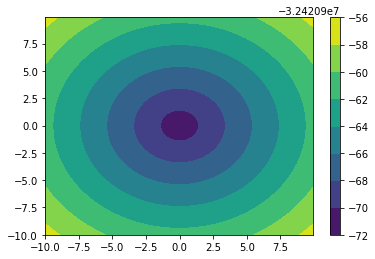

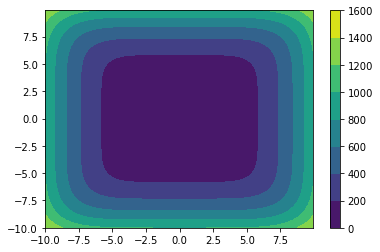

In [37]:
x=np.arange(-10,10,0.1)
y=np.arange(-10,10,0.1)
r_0=[0,0]

XX,YY=np.meshgrid(x,y)

a = elecFieldPot(np.array([1,0]), x[1] , y[1])
Z = a + np.sqrt(XX**2+YY**2)
print "Z: %s" %(Z)
plt.figure()
cp = plt.contourf(XX, YY,Z)
plt.colorbar(cp)
plt.show()

Z = np.sqrt(XX**6 + YY**6)
plt.figure()
cp = plt.contourf(XX, YY,Z)
plt.colorbar(cp)
plt.show()



In [85]:
field_strength(np.array([1,0]),5,3)

array([ 54667343.45378497,  60000742.81512983])

/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


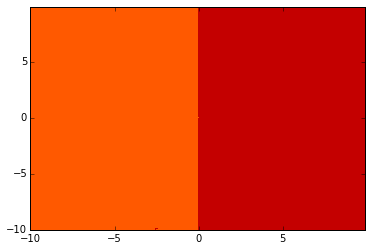

In [88]:
p = np.array([1,0])
count = 0
fieldPot = np.zeros([1,len(XX.flatten())])
fieldStren = np.zeros([1,len(XX.flatten())])
for x,y in np.c_[XX.flatten(),YY.flatten()]:
    fieldPot[0, count] = elecFieldPot(p, x, y)
    #fieldStren[0, count] = field_strength(p, x, y)
    count += 1
    
fieldPot = fieldPot.reshape([200,200])
#fieldStren = fieldStren.reshape([200,200])



plt.figure()
plt.contourf(XX,YY,fieldPot)
plt.hold('on')
#plt.streamplot(XX,YY, ???)



In [83]:
? plt.streamplot